In [1]:
import pandas as pd

from paths import *
from exploration import *

In [2]:
# from data_preparation import get_category_info
# colorScale, categoryName, AQScale = get_category_info()

In [3]:
# from data_preparation import get_metadata, get_series,clip_missing_prone_values, prepare_division_and_country_series
#
# series_with_heavy_missing, metadata_with_heavy_missing = get_series(), get_metadata()
# division_missing_counts, metadata, series = clip_missing_prone_values(metadata_with_heavy_missing, series_with_heavy_missing)
# region_series, metadata_region, country_series, metadata_country = prepare_division_and_country_series(series,
#                                                                                                        metadata)

In [2]:
from data_preparation import read_region_and_country_series
# region_series, metadata_region, country_series, metadata_country = read_region_and_country_series()

In [2]:
from data_preparation.spatio_temporal_filtering import read_bd_data_4_years,read_bd_data

metadata, series, metadata_region, region_series, metadata_country, country_series = read_bd_data_4_years()

In [2]:
series_stack = series.stack()
series_stack.name = 'reading'
series_stack.head(5)

time                           
2018-01-01  Azimpur_Dhaka          131.2
            Barisal_Barisal        118.2
            Bhairab Bazar_Dhaka    106.3
            Bhola_Barisal          112.9
            Bogra_Rajshahi         101.5
Name: reading, dtype: float64

In [3]:
series.shape

(35064, 55)

In [11]:
series_stack.describe().iloc[1:]

mean     58.730112
std      45.042786
min       1.700000
25%      23.900000
50%      44.200000
75%      82.500000
max     552.500000
Name: reading, dtype: float64

In [22]:
# import seaborn as sns
# sns.displot(data=country_series.stack(), x="data", kde=True)

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
import plotly.figure_factory as ff

hist_data = [series_stack]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,bin_size=5, show_rug=False)
fig.update_layout(height=750,font_size=21,xaxis_title='reading',yaxis_title='kde')
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 10
    )
)
fig.show()

In [5]:
# series.shape

In [3]:
region_series.shape[0]

46704

In [4]:
country_series.shape

(46704, 2)

In [42]:
# missing_data_heatmap(country_series)

In [43]:
# missing_data_heatmap(region_series)

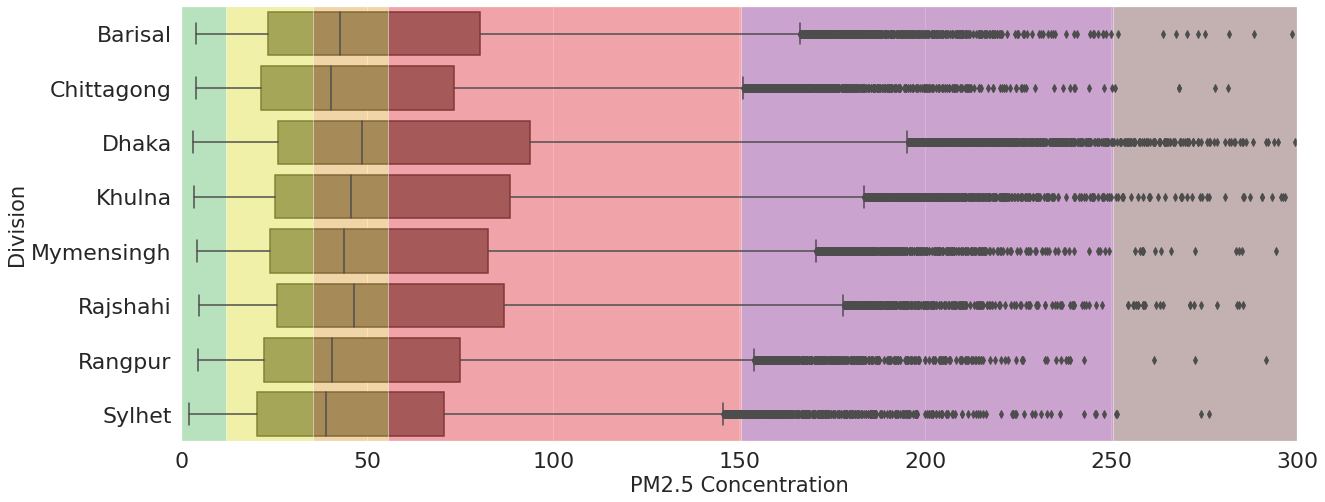

In [3]:
# from exploration import box_plot_series
import matplotlib.pyplot as plt
color_scale, category_name, aq_scale = get_category_info()

def box_plot_series(df):
    sns.set(font_scale = 2)
    plt.figure(figsize=(20, 8))
    ax = sns.boxplot(data=df, color="grey", orient="h")
    for i, c in enumerate(color_scale): ax.axvspan(aq_scale[i], aq_scale[i + 1], facecolor=c, alpha=0.3)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", size=12)
    # ax.set_yticklabels(ax.get_yticklabels(), size=15)
    ax.set_xlabel('PM2.5 Concentration', fontsize=21)
    ax.set_ylabel('Division', fontsize=21)
    ax.set(xlim=(0, 300))
    plt.show()

box_plot_series(region_series)

NameError: name 'ax' is not defined

In [27]:
region_series.describe()
# .iloc[1]

,Barisal,Chittagong,Dhaka,Khulna,Mymensingh,Rajshahi,Rangpur,Sylhet
count,34000.000000,33882.000000,34001.000000,34087.000000,33957.000000,34048.000000,33920.000000,31771.000000
mean,56.456691,51.716308,66.218046,61.487438,57.873949,60.632318,52.956973,49.668857
std,42.009271,38.245040,51.983773,46.176538,42.770654,43.461490,38.155479,36.830927
min,4.070000,3.850000,3.130000,3.340000,4.200000,4.740000,4.580000,2.070000
25%,23.200000,21.450000,25.970000,25.190000,23.840000,25.770000,22.350000,20.350000
50%,42.730000,40.210000,48.690000,45.520000,43.760000,46.380000,40.620000,39.000000
75%,80.430000,73.290000,93.710000,88.520000,82.560000,86.672500,74.950000,70.515000
max,321.670000,356.920000,452.720000,424.420000,331.740000,374.230000,355.200000,336.300000


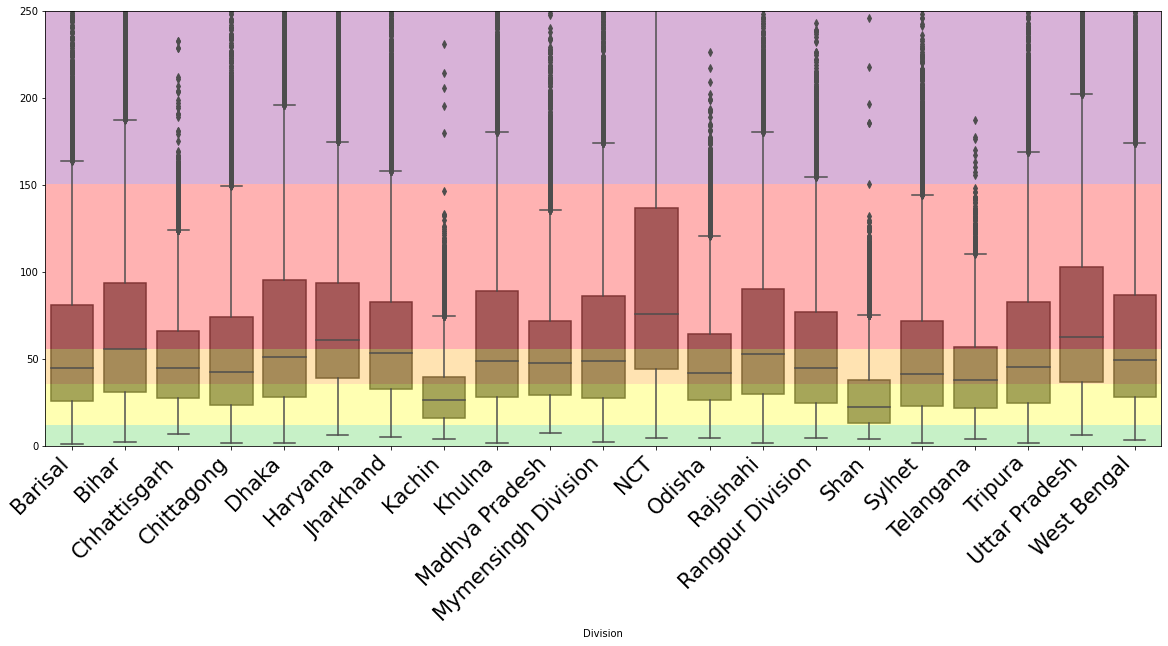

In [45]:
box_plot_series(region_series)

In [37]:
def make_category_frequency(timeseries):
    def cut_and_count(x): return pd.cut(x, AQScale, labels=categoryName).value_counts() / x.count()

    def ranking(timeseries): return timeseries.mean().sort_values()

    ranking = ranking(timeseries)
    category_frequency = timeseries.apply(cut_and_count)
    category_frequency = category_frequency[ranking.index] * 100
    return category_frequency

category_frquency = make_category_frequency(region_series)

In [38]:
category_frquency

,Sylhet,Chittagong,Rangpur,Barisal,Mymensingh,Rajshahi,Khulna,Dhaka
Good,7.207831,5.312555,3.540684,4.008824,3.377801,2.337876,3.162496,3.758713
Moderate,39.334613,40.148161,41.126179,38.988235,38.534028,37.044760,36.799953,33.899003
Unhealthy for Sensitive Groups,18.051053,18.024320,17.214033,17.285294,17.024472,17.393092,17.511075,17.425958
Unhealthy,33.750905,34.242371,36.170401,36.097059,37.099862,38.789356,37.160794,36.422458
Very Unhealthy,1.611533,2.234225,1.922170,3.579412,3.901994,4.358553,5.248335,8.158584
Hazardous,0.044065,0.038368,0.026533,0.041176,0.061843,0.076363,0.117347,0.335284


In [43]:
category_frquency.iloc[3:].sum()

Sylhet        35.406503
Chittagong    36.514964
Rangpur       38.119104
Barisal       39.717647
Mymensingh    41.063698
Rajshahi      43.224272
Khulna        42.526476
Dhaka         44.916326
dtype: float64

In [46]:
# from aq_analysis import stacked_bar
#
# stacked_bar(country_series)
# PLotlyTimeSeries(country_series)
# day_night_distribution(country_series)

In [47]:
series_bd = country_series.Bangladesh["2018":"2021"]

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# knn_imputer = KNNImputer(n_neighbors=24*90, weights="distance")
# series_bd_imputed = knn_imputer.fit_transform(series_bd.to_frame())
imputer = IterativeImputer()
series_bd_imputed = imputer.fit_transform(series_bd.to_frame())
series_bd_imputed = pd.Series(series_bd_imputed[:,0],index=series_bd.index)
series_bd_imputed.name = "Bangladesh_imputed"
series_bd_original_and_imputed = pd.concat((series_bd,series_bd_imputed),axis=1)
series_bd_original_and_imputed

,Bangladesh,Bangladesh_imputed
time,,
2018-01-01 00:00:00,115.10,115.10
2018-01-01 01:00:00,114.65,114.65
2018-01-01 02:00:00,120.66,120.66
2018-01-01 03:00:00,139.85,139.85
2018-01-01 04:00:00,147.88,147.88
...,...,...
2021-12-31 19:00:00,101.51,101.51
2021-12-31 20:00:00,109.42,109.42
2021-12-31 21:00:00,115.35,115.35


In [ ]:
def stacked_bar_h(series):
    category_frquency = make_category_frequency(series)

    datas = [go.Bar(y=category_frquency.columns.values, x=row,
                    marker_color=colorScale[categoryName.tolist().index(idx)],
                    name=idx, opacity=.666, orientation='h') for idx, row in category_frquency.iterrows()]
    fig = go.Figure(data=datas)
    fig.update_layout(
        width=1500,
        height=600,
        legend_orientation="h",
        font=dict(size=24),
        barmode='stack',
        template='plotly_white',
        yaxis_title='Percentage of occurrence'
        # legend={"x": 0, "y": -.3}
    )
    fig.show()

stacked_bar_h(region_series)

In [ ]:
from aq_analysis import stacked_bar

stacked_bar(region_series)

In [ ]:
time_series = country_series[["Bangladesh"]]
sampling_hours = 1
time_series = time_series.resample(str(sampling_hours) + 'H').mean()
time_series = time_series.fillna(-1)
time_series = time_series.stack().reset_index().set_index('time')
time_series = time_series.replace({-1: None})
time_series.columns = ['zone', 'reading']

# time_series['diurnal_name'] = np.tile(
#     np.hstack((np.repeat('Day', 12 * 30 // sampling_hours), np.repeat('Night', 12 * 30 // sampling_hours))),
#     ((time_series.shape[0] * sampling_hours) // (24 * 30)))

time_series = time_series.join(get_diurnal_period())
time_series['month'] = time_series.index.month_name()


In [10]:
time_series

,zone,reading,diurnal_name,month
time,,,,
2018-01-01 00:00:00,Bangladesh,115.05,night,January
2018-01-01 01:00:00,Bangladesh,114.99,night,January
2018-01-01 02:00:00,Bangladesh,121.38,night,January
2018-01-01 03:00:00,Bangladesh,140.94,night,January
2018-01-01 04:00:00,Bangladesh,149.02,night,January
...,...,...,...,...
2021-12-31 19:00:00,Bangladesh,101.77,NaN,December
2021-12-31 20:00:00,Bangladesh,111.06,NaN,December
2021-12-31 21:00:00,Bangladesh,117.63,NaN,December


# Statistical Significance Test Diurnal

In [27]:
group_a = time_series[(time_series.diurnal_name=='day') & (time_series.month=='December')].reading
group_b = time_series[(time_series.diurnal_name=='night') & (time_series.month=='December')].reading

# group_a = time_series[(time_series.diurnal_name=='day') & (time_series.month=='August')].reading
# group_b = time_series[(time_series.diurnal_name=='night') & (time_series.month=='August')].reading

In [28]:
group_a = group_a.fillna(0)
group_b = group_b.fillna(0)

In [29]:
from scipy import stats

t_value, p_value = stats.ttest_ind(group_a,group_b)

t_value, p_value

(-14.256337884097595, 3.3712404749170797e-44)

In [30]:
1-p_value

1.0

In [ ]:
from exploration import day_night_distribution_monthly

# day_night_distribution(country_series[["Bangladesh"]])
day_night_distribution_monthly(country_series[["Bangladesh"]])

# Statistical Significance Test Week

In [ ]:
from plotly.subplots import make_subplots

weekend_by_country = {'Bangladesh': ['Friday', 'Saturday'], 'India': ['Saturday', 'Sunday'],
                      'Myanmar': ['Saturday', 'Sunday']}
week_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

for i, country_name in enumerate(country_series[["Bangladesh"]]):
    day_names = country_series.index.day_name()
    week_group = country_series[country_name].groupby(day_names)
    week_info = pd.concat([week_group.mean(), week_group.std()], axis=1)
    week_info['color'] = week_info.apply(
        lambda x: '#8fcadd' if x.name in weekend_by_country[country_name] else '#ff0000', axis=1)
    week_info = week_info.reindex(week_day)

    fig.add_trace(
        # go.Scatter(x=mobility_two_year.index, y=mobility_two_year[mobility_type], fill='tozeroy', mode='lines', line_color='indigo'),
        go.Bar(
            x=week_info.index,
            y=week_info.iloc[:, 0],
            error_y=dict(type='data', array=week_info.iloc[:, 1]),
            marker_color=week_info.color  # marker color can be a single color value or an iterable
        ),
        row=i + 1, col=1)

    fig.update_yaxes(title_text=country_name + ' Reading' , row=i + 1, col=1, range=[0, 115], )

fig.update_layout(height=800, width=1600,
                  title_text="Stacked Subplots with Shared X-Axes", legend_orientation='h', font_size=15)

fig.show()

In [ ]:
from plotly.subplots import make_subplots

def weekday_by_season(series):
    weekend_by_country = {'Bangladesh': ['Friday', 'Saturday'], 'India': ['Saturday', 'Sunday'],
                          'Myanmar': ['Saturday', 'Sunday']}
    week_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

    fig = make_subplots(rows=2, cols=1,
                        shared_xaxes=True,
                        vertical_spacing=0.02)

    season_month = {'summer':[6,7,8],'winter':[12,1,2]}

    for j, country_name in enumerate(series):
        for i,season in enumerate(['summer','winter']):
            country_series_season = country_series[country_series.index.month.isin(season_month[season])]
            day_names = country_series_season.index.day_name()
            week_group = country_series_season[country_name].groupby(day_names)
            week_info = pd.concat([week_group.mean(), week_group.std()], axis=1)
            week_info['color'] = week_info.apply(
                lambda x: '#8fcadd' if x.name in weekend_by_country[country_name] else '#ff0000', axis=1)
            week_info = week_info.reindex(week_day)

            fig.add_trace(
                # go.Scatter(x=mobility_two_year.index, y=mobility_two_year[mobility_type], fill='tozeroy', mode='lines', line_color='indigo'),
                go.Bar(
                    x=week_info.index,
                    y=week_info.iloc[:, 0],
                    error_y=dict(type='data', array=week_info.iloc[:, 1]),
                    marker_color=week_info.color  # marker color can be a single color value or an iterable
                ),
                row=i + 1, col=1)

            fig.update_yaxes(title_text=season + ' reading' , row=i + 1, col=1, range=[0, 165], )

    fig.update_layout(height=900, width=1800,
                      title_text="Stacked Subplots with Shared X-Axes", legend_orientation='h', font_size=18)

    fig.show()

weekday_by_season(country_series[["Bangladesh"]])

In [92]:
weekend_by_country = {'Bangladesh': ['Friday', 'Saturday'], 'India': ['Saturday', 'Sunday'],
                      'Myanmar': ['Saturday', 'Sunday']}
week_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

season_month = {'summer':[6,7,8],'winter':[12,1,2]}
# season_month = {'summer':[7],'winter':[1]}

for j, country_name in enumerate(country_series):
    for i,season in enumerate(['summer','winter']):
        country_series_season = country_series[country_series.index.month.isin(season_month[season])]
        day_names = country_series_season.index.day_name()
        week_group = country_series_season[country_name].groupby(day_names)
        week_info = pd.concat([week_group.mean(), week_group.std()], axis=1)
        week_info['color'] = week_info.apply(
            lambda x: '#8fcadd' if x.name in weekend_by_country[country_name] else '#ff0000', axis=1)
        week_info = week_info.reindex(week_day)
        # print(week_group)
        # print(week_info)

        # group_a = week_group.get_group('Friday')
        # group_b = week_group.get_group('Tuesday')
        # group_b = week_group.get_group('Thursday')
        # group_b = week_group.get_group('Saturday')
        group_a = pd.concat((week_group.get_group(day) for day in ['Friday', 'Saturday']))
        group_b = pd.concat((week_group.get_group(day) for day in ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']))

        group_a = group_a.fillna(0)
        group_b = group_b.fillna(0)

        from scipy import stats

        t_value, p_value = stats.ttest_ind(group_a, group_b)

        print(group_a.median(),group_b.median())
        print(t_value, p_value)

20.845 21.86
-4.658837257970667 3.2265252850217324e-06
104.485 107.565
-1.9543262838822175 0.05069477153909702


In [98]:
# a,b = 20.845,21.86
a,b = 104.485, 107.565

In [99]:
(a-b)/b

-0.028633849300422985

In [39]:
for day, weekday_series in week_group:
    print(weekday_series.shape)

(1224,)
(1224,)
(1224,)
(1224,)
(1248,)
(1248,)
(1272,)


In [76]:
group_a = week_group.get_group('Friday')
group_b = week_group.get_group('Tuesday')
# group_b = week_group.get_group('Thursday')
# group_b = week_group.get_group('Saturday')

# group_a = pd.concat((week_group.get_group(day) for day in ['Friday', 'Saturday']))
# group_b = pd.concat((week_group.get_group(day) for day in ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']))

group_a.shape,group_b.shape

((2448,), (6216,))

In [75]:
group_a = group_a.fillna(0)
group_b = group_b.fillna(0)
from scipy import stats

t_value, p_value = stats.ttest_ind(group_a, group_b)

t_value, p_value

(-1.9543262838822175, 0.05069477153909702)